# Задание 1
Для выбранного и предобработанного датасета из лабораторной работы 1, учитывая особенности моделей:

Произвести классификацию используя:
## 1. Наивный баессовский классификатор

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
# Загрузить данные
df = pd.read_csv("yoda-corpus.csv")
features = df[['line']]
print(features.values)
# Создать вектор бинарных целей
target = df['movie']
# Создать объект бернуллиева наивного Байеса с априорными вероятностями каждого класса 
clf = BernoulliNB()
# Натренировать модель
model = clf.fit(features, target)
# Создать новое наблюдение
new_observation = [[80],[85],[90],[87],[77],[95],[82],[100],[96],[84]]
# Предсказать класс
model.predict(new_observation)
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

[[1158]
 [1159]
 [1160]
 [1161]
 [1162]
 [1163]
 [1164]
 [1165]
 [1166]
 [1167]
 [1168]
 [1169]
 [1170]
 [1171]
 [1172]
 [1173]
 [1174]
 [1175]
 [1176]
 [1177]
 [1178]
 [1179]
 [1180]
 [1181]
 [1182]
 [1183]
 [1184]
 [1258]
 [1259]
 [1260]
 [1261]
 [1262]
 [1263]
 [1264]
 [1265]
 [1266]
 [1267]
 [1268]
 [1269]
 [1270]
 [1271]
 [1272]
 [1273]
 [1274]
 [1275]
 [1276]
 [1277]
 [1278]
 [1303]
 [1304]
 [1305]
 [1306]
 [1307]
 [1308]
 [1309]
 [1310]
 [1311]
 [1312]
 [1313]
 [1314]
 [1315]
 [1316]
 [1317]
 [1318]
 [1319]
 [1320]
 [1321]
 [1322]
 [1323]
 [1324]
 [1325]
 [1326]
 [1327]
 [1328]
 [1329]
 [1330]
 [1331]
 [1332]
 [1333]
 [1334]
 [1335]
 [1336]
 [1687]
 [1688]
 [1689]
 [1690]
 [1691]
 [1692]
 [1693]
 [1694]
 [1695]
 [1696]
 [1697]
 [1698]
 [1699]
 [1700]
 [1701]
 [ 543]
 [ 544]
 [ 545]
 [ 546]
 [ 547]
 [ 548]
 [ 549]
 [ 550]
 [ 551]
 [ 552]
 [ 553]
 [ 554]
 [ 617]
 [ 618]
 [ 619]
 [ 620]
 [ 621]
 [ 622]
 [ 623]
 [ 624]
 [ 625]
 [ 626]
 [ 627]
 [ 628]
 [ 629]
 [ 630]
 [ 631]
 [ 632]


/home/andor/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


## 2. Метод k-ближайших соседей 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(df[['line']], df['movie'], random_state=0)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
X_new = np.array([[80],[85],[90],[87],[77],[95],[82],[100],[96],[84]])
print("форма массива X_new: {}".format(X_new.shape))
#Делаем прогноз
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))
#y_train

форма массива X_new: (10, 1)
Прогноз: [6 6 6 6 6 6 6 6 6 6]
Правильность на тестовом наборе: 0.88


/home/andor/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 3. Метод опорных векторов

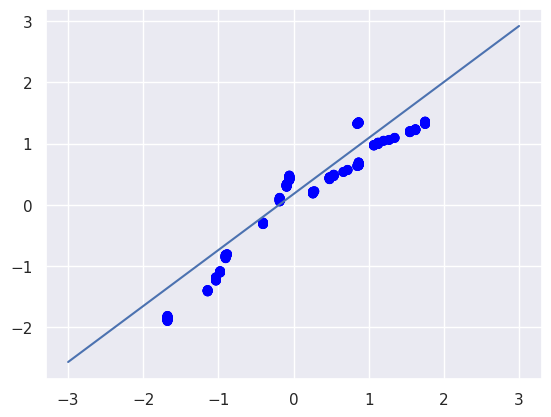

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Воспользуемся настройками по умолчанию библиотеки Seaborn
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
sns.set()
# Загрузить данные всего с двумя классами и двумя признаками 
features = df[['scene','line']]
target = df['movie']
# Стнадартизировать признаки 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать опорно-векторный классификатор 
svc = LinearSVC(C=1.0)
# Натренировать модель
model = svc.fit(features_standardized, target)

# Вывести точки данных на график и расцветить, используя их класс 
color = ["red" if C == 10 else "blue" for C in target] 
plt.scatter(features_standardized[:,-0], features_standardized[:,1], c=color)

# Создать гиперплоскость 
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(3, -3)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость 
plt.plot(xx, yy)
plt.show ()

## 4. Деревья решений и случайные леса

In [11]:
import pandas as pd

# Импортируем
df = pd.read_csv("pokemonGO.csv")
df.head()


,Pokemon No.,Name,Type 1,Type 2,MaxCP,MaxHP
0,1,Bulbasaur,Grass,Poison,1079,83
1,2,Ivysaur,Grass,Poison,1643,107
2,3,Venusaur,Grass,Poison,2598,138
3,4,Charmander,Fire,NaN,962,73
4,5,Charmeleon,Fire,NaN,1568,103


In [12]:
# Формируем данные для обучения
X = df.drop('Type 2', axis=1)
X = X.drop('Pokemon No.', axis=1)
X = X.drop('Name', axis=1)
X = X.drop('Type 1', axis=1)

# Формируем целевую переменную (то, что будем классифицировать)
y = df['Type 1']
X

,MaxCP,MaxHP
0,1079,83
1,1643,107
2,2598,138
3,962,73
4,1568,103
...,...,...
146,990,76
147,1760,108
148,3525,156
149,4174,180


In [13]:
# Импортируем классификатор - случайный лес (дла обычного дерева процесс будет таким же)
from sklearn.ensemble import RandomForestClassifier

# Создаём модель
model = RandomForestClassifier()

# Учим
model.fit(X, y)

RandomForestClassifier()

In [14]:
# Формируем переменную с параметрами, которые не участвовали в обучении. Попробуем классифицировать на её основе город. Строки должны быть в таком же порядке как и при обучении
example = {'MaxCP': [2800],
		   'MaxHP': [157],
		   }

# Перегоняем в нужный формат
example_df = pd.DataFrame(example)

# Классифицируем и смотрим, что модель обучилась и что то классифицировала - вроде работает
model.predict(example_df)

array(['Fighting'], dtype=object)

# Задание 2

Задание 2. На наборе данных Boston Housing https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset 
сравнить работу алгоритмов линейной регрессии, гребневой регрессии (L2 -регуляризации), лассо-регрессии (L1 регуляризации )

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Text(0, 0.5, 'MEDV')

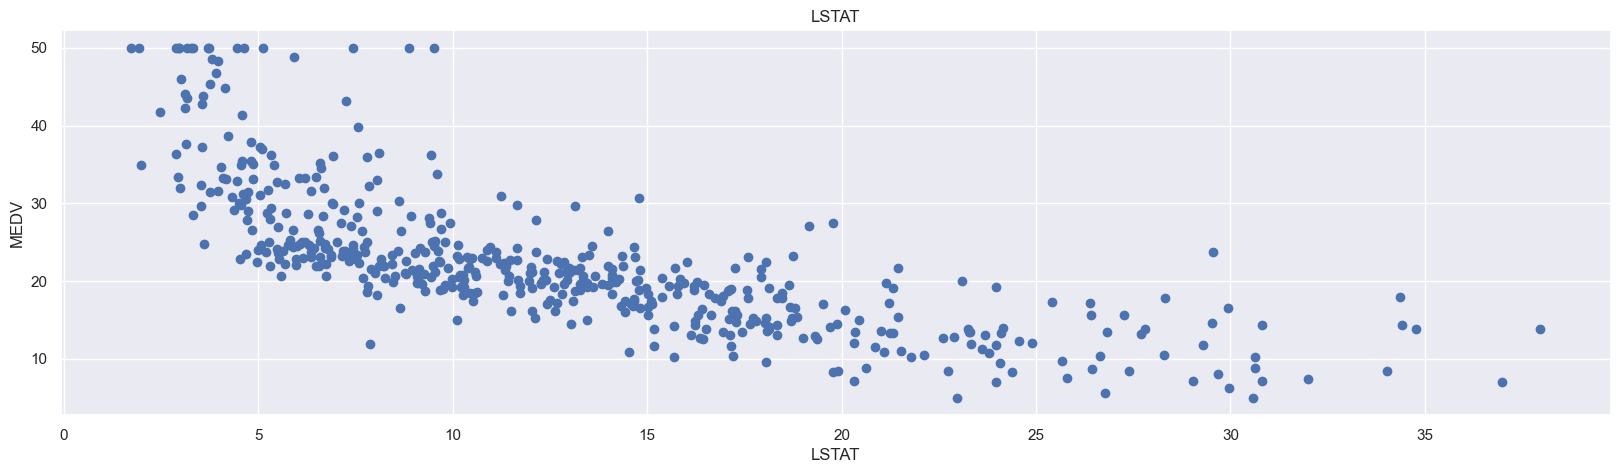

In [ ]:
boston['MEDV'] = boston_dataset.target
plt.figure(figsize=(20, 5))
features = ['LSTAT']
target = boston['MEDV']
plt.subplot(1, len(features) , 1)
x = boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title(col)
plt.xlabel(col)
plt.ylabel('MEDV')

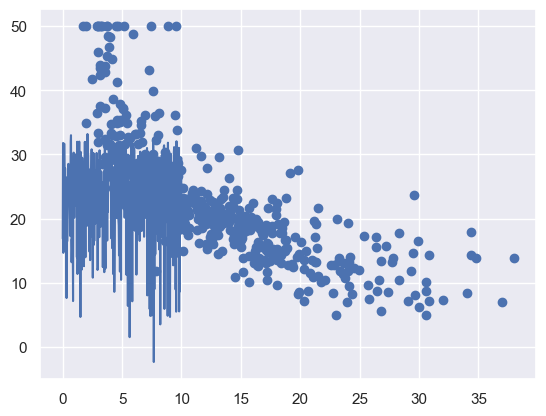

In [ ]:
# линейная регрессия
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, Y_train)
yfit = model.predict(X_train)
xfit = np.linspace(0, 10, 404)
plt.scatter(X, Y)
plt.plot(xfit, yfit)


C:\Users\vadim\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.19551e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


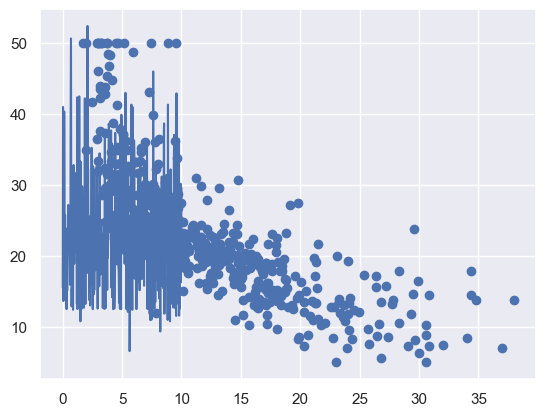

In [ ]:
# гребневая регрессия
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1))
model.fit(X_train, Y_train)
yfit = model.predict(X_train)
xfit = np.linspace(0, 10, 404)
plt.scatter(X, Y)
plt.plot(xfit, yfit)

C:\Users\vadim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.795e+03, tolerance: 3.470e+00
  model = cd_fast.enet_coordinate_descent(


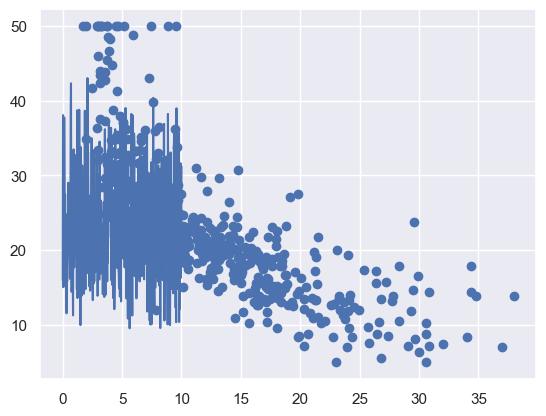

In [ ]:
# лассо-регрессии
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001))
model.fit(X_train, Y_train)
yfit = model.predict(X_train)
xfit = np.linspace(0, 10, 404)
plt.scatter(X, Y)
plt.plot(xfit, yfit)

# Задание 3

Задание 3. Используя небор данных Breast Cancer Wisconsin (Diagnostic) Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data сравнить работу алгоритмов k-средних, DBSCAN и агломеративной кластеризации

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # для стилизации графиков
import numpy as np

df = pd.read_csv("data.csv")
x_axis = df.data[:, 4]  # Sepal Length
y_axis = df.data[:, 5]  # Sepal Width

# Построение
plt.xlabel(df.feature_names[0])
plt.ylabel(df.feature_names[1])
plt.scatter(x_axis, y_axis, c=df.target)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'data'